In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay


In [21]:

# Define the StepFunction and RosenblattNeuron classes
class StepFunction(object):
    def __init__(self):
        pass
    def linear(self, sum):
        return np.where(sum >= 0, 1, -1)

class RosenblattNeuron(object):
    def __init__(self, shape, learning_rate=0.1, epochs=10, verbose=False):
        self.shape = shape
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.verbose = verbose  # Add this line
        self.weights = np.zeros(self.shape)
        self.bias = np.zeros(1)

    def train(self, inputs, targets, loss_func=object):
        total_error = 0
        self.loss_function = loss_func
        for epoch in range(self.epochs):
            for i in range(len(inputs)):
                input_pattern = inputs[i]
                target = targets[i]
                output = input_pattern.dot(self.weights) + self.bias
                prediction = loss_func.linear(output)
                total_error += target - prediction

                if target != prediction:
                    self.weights += self.learning_rate * target * input_pattern
                    self.bias += self.learning_rate * target

            if self.verbose:
                print(f"Epoch {epoch + 1}, Total Error: {total_error}")

    def predict(self, inputs, ret=False):
        self.out_raw = []
        self.out_val = []
        for input_pattern in inputs:
            sum = input_pattern.dot(self.weights) + self.bias
            self.out_raw.append(sum)
            output = self.loss_function.linear(sum)
            self.out_val.append(output)
            if not ret:
                print(f"Input: {input_pattern}, Output: {output}")
        return np.array(self.out_val)

    def TruthTable(self, input, input_labels, output_labels):
        table = pd.DataFrame(input, columns=input_labels)
        self.predict(input, True)
        table[output_labels] = pd.Series(self.out_val)
        return table



In [18]:

# Generate synthetic data
X = pd.DataFrame({
    'x1': np.random.randn(200),
    'x2': np.random.randn(200)
})
y = np.where(X['x1'] + X['x2'] > 0, 1, -1)


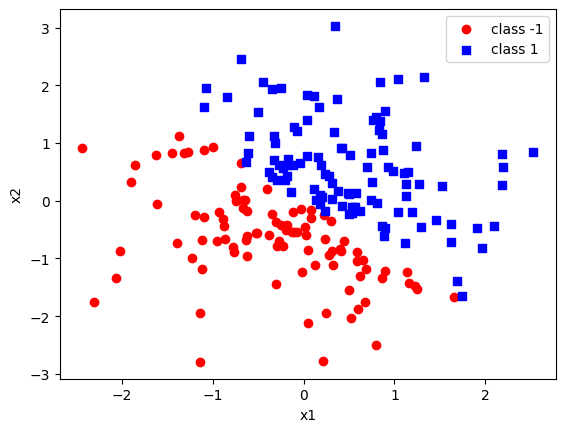

In [19]:

# Plot synthetic data
fig, ax = plt.subplots()
ax.scatter(X.loc[y == -1, 'x1'], X.loc[y == -1, 'x2'], color='red', marker='o', label='class -1')
ax.scatter(X.loc[y == 1, 'x1'], X.loc[y == 1, 'x2'], color='blue', marker='s', label='class 1')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()

In [23]:

# Train Rosenblatt Perceptron
inputs = np.array(X)
targets = np.array(y)
step = StepFunction()

rosen = RosenblattNeuron(inputs.shape[1], learning_rate=0.1, epochs=100)
rosen.train(inputs, targets, step)
#rosen.predict(inputs)

In [24]:

# Plot decision boundary for Rosenblatt Perceptron
x1, x2 = np.meshgrid(
    np.linspace(X['x1'].min() - 1, X['x1'].max() + 1, num=200),
    np.linspace(X['x2'].min() - 1, X['x2'].max() + 1, num=200)
)
grid = np.vstack([x1.ravel(), x2.ravel()]).T
rosen.predict(grid, True)
y_pred = np.reshape(rosen.out_val, x1.shape)


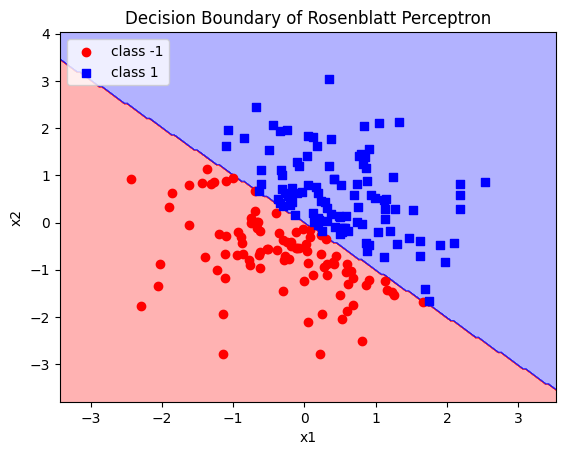

In [25]:

fig = plt.figure()
ax = fig.subplots()
cmap = ListedColormap(['red', 'blue'])
display = DecisionBoundaryDisplay(xx0=x1, xx1=x2, response=y_pred)
display.plot(ax=ax, plot_method='contourf', cmap=cmap, alpha=0.3)
ax.scatter(X.loc[y == -1, 'x1'], X.loc[y == -1, 'x2'], color='red', marker='o', label='class -1')
ax.scatter(X.loc[y == 1, 'x1'], X.loc[y == 1, 'x2'], color='blue', marker='s', label='class 1')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend(loc='upper left')
plt.title('Decision Boundary of Rosenblatt Perceptron')
plt.show()


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap


In [12]:

class StepFunction(object):
    def __init__(self):
        pass
    def linear(self, sum):
        return np.where(sum >= 0, 1, 0)

class AdelineNeuron(object):
    def __init__(self, shape, learning_rate=0.1, epochs=10, random_state=1, verbose=False):
        self.shape = shape
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(self.shape)
        self.bias = np.zeros(1)
        self.random_state = random_state
        self.verbose = verbose
        random.seed(self.random_state)

    def train(self, inputs, targets, act_func=object):
        self.act_function = act_func
        self.target = targets
        self.n_misclassifications_ = []
        self.total_errors = []
        for epoch in range(self.epochs):
            total_error = 0
            n_missclassifications = 0
            if self.verbose:
                print(f"Epoch: {epoch+1}")
            for i in range(len(inputs)):
                input_pattern = inputs[i]
                target = targets[i]
                output = input_pattern.dot(self.weights) + self.bias
                prediction = self.act_function.linear(output)
                error = target - prediction
                total_error += error
                n_missclassifications += int(prediction != target)

                if target != prediction:
                    self.weights += self.learning_rate * error * input_pattern
                    self.bias += self.learning_rate * error

                    if self.verbose:
                        print(f"Weight updated: {self.weights[0]}")
                        print(f"Weight updated: {self.weights[1]}")
                        print(f"Bias updated: {self.bias}")
                        print(f"Total error: {total_error}")
                        print("----------------------------------------")
            self.n_misclassifications_.append(n_missclassifications)
            self.total_errors.append(total_error)

            if self.verbose:
                print(f"Total error: {total_error}")
                print("----------------------------------------")
            if n_missclassifications == 0:
                break
        return self

    def predict(self, inputs, ret=False):
        self.out_raw = []
        self.out_val = []
        for input_pattern in inputs:
            sum = input_pattern.dot(self.weights) + self.bias
            self.out_raw.append(sum)
            output = self.act_function.linear(sum)
            self.out_val.append(output[0])
            if not ret:
                print(f"Input: {input_pattern}, Prediction: {output > 0}")
        return np.array([self.out_val])


    def TruthTable(self, input, input_labels, output_labels, pred_labels="pre"):
        table = pd.DataFrame(input, columns=input_labels)
        self.predict(input, True)
        table[output_labels] = pd.Series(self.target)
        table[pred_labels] = pd.Series(self.out_val)
        return table


In [13]:

# Generate synthetic data
gen = np.random.RandomState(1)
mean1, cov1 = [0, 0], [[1, 1], [1, 3]]
mean2, cov2 = [0, 10], [[1, 50], [1, 3]]
n_samples = 400
X, y = pd.DataFrame(np.vstack([np.random.multivariate_normal(mean1, cov1, size=int(n_samples/2)),
                               np.random.multivariate_normal(mean2, cov2, size=int(n_samples/2))]),
                    columns=['x1', 'x2']), pd.Series([0]*int(n_samples/2)+[1]*int(n_samples/2), name='target')


<ipython-input-13-f5df41f4bd6c>:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  np.random.multivariate_normal(mean2, cov2, size=int(n_samples/2))]),


<ipython-input-12-8536fae6b438>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n_missclassifications += int(prediction != target)


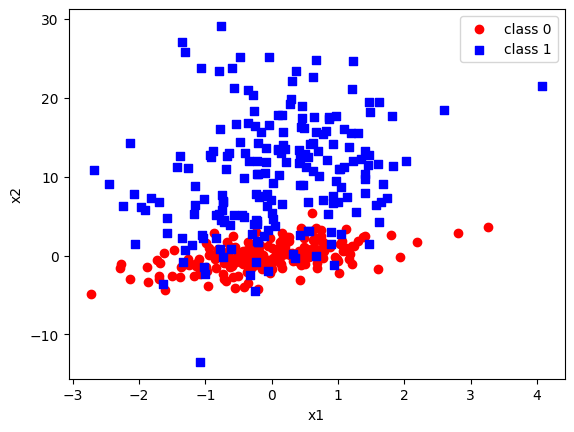

In [15]:

# Plot synthetic data
fig, ax = plt.subplots()
ax.scatter(X.loc[y==0, 'x1'], X.loc[y==0, 'x2'], color='red', marker='o', label='class 0')
ax.scatter(X.loc[y==1, 'x1'], X.loc[y==1, 'x2'], color='blue', marker='s', label='class 1')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()

inputs = np.array(X)
targets = np.array(y)
step = StepFunction()

adel = AdelineNeuron(inputs.shape[1], learning_rate=1, epochs=100)
learning_adel = adel.train(inputs, targets, step)
#adel.predict(inputs)


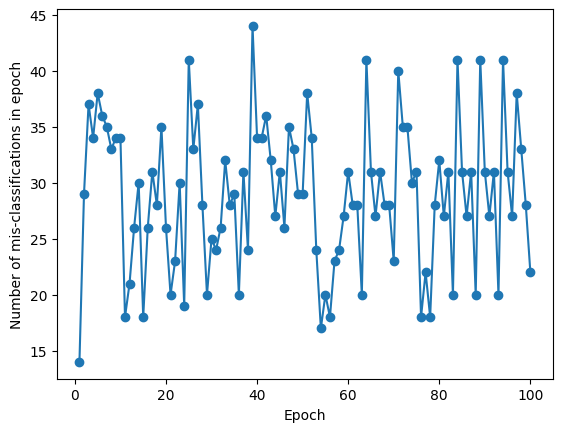

Weights and bias: [-0.72974816  0.37290196], [5.]


In [9]:

# Plot convergence
fig, ax = plt.subplots()
ax.plot(range(1, len(learning_adel.n_misclassifications_)+1), learning_adel.n_misclassifications_, marker='o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Number of mis-classifications in epoch')
plt.show()

print(f'Weights and bias: {adel.weights}, {adel.bias}')


In [10]:

# Plot decision boundary
colors = ['red', 'blue']
cmap = ListedColormap(colors[:len(np.unique(y))])

x1, x2 = np.meshgrid(
    np.linspace(X.iloc[:,0].min(), X.iloc[:,0].max(), num=200),
    np.linspace(X.iloc[:,1].min(), X.iloc[:,1].max(), num=200)
)
grid = np.vstack([x1.ravel(), x2.ravel()]).T
adel.predict(grid, True)
y_pred = np.reshape(adel.out_val, x1.shape)


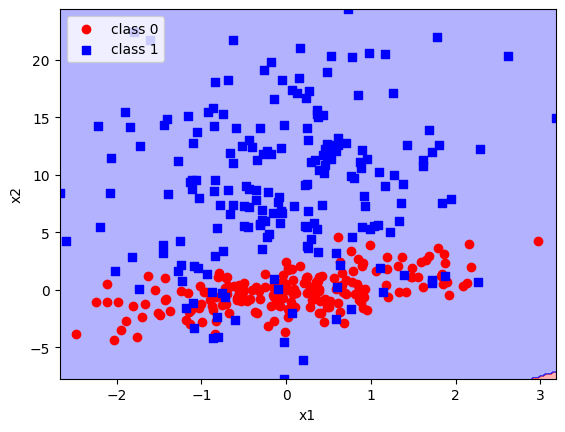

In [11]:

fig, ax = plt.subplots()
display = DecisionBoundaryDisplay(xx0=x1, xx1=x2, response=y_pred)
display.plot(ax=ax, plot_method='contourf', cmap=cmap, alpha=0.3)
ax.scatter(X.loc[y==0, 'x1'], X.loc[y==0, 'x2'], color='red', marker='o', label='class 0')
ax.scatter(X.loc[y==1, 'x1'], X.loc[y==1, 'x2'], color='blue', marker='s', label='class 1')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend(loc='upper left')
plt.show()
